In [ ]:
import numpy as np
import pandas as pd
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

In [ ]:
def pad(a):
    zeros = np.zeros((140,155,3))
    zeros = np.where(zeros == 0, 255, 0)
    zeros[:a.shape[0], :a.shape[1], :] = a
    return zeros

In [ ]:
drive.mount("Data_forCV")

NameError: ignored

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png']


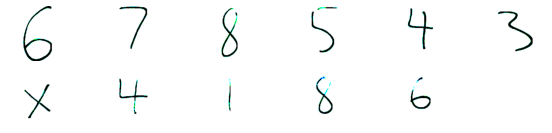

In [ ]:
import os
count = 0
filenameList = [0] * 100
for filename in os.listdir('/content/Data_forCV/MyDrive/Senior Year/Computer Vision/CV Final Project/Data_forCV2/MonoImages/'):
  with open(os.path.join('/content/Data_forCV/MyDrive/Senior Year/Computer Vision/CV Final Project/Data_forCV2/MonoImages/', filename), 'r') as f:
    if filename[1] == ".":
      filenameList[int(filename[0])] = filename
    else:
      filenameList[int(filename[:2])] = filename
endValue = 0
def fileList(lister):
  for value in range(0, len(lister)):
    if filenameList[value] == 0:
      return value
truncateFileList = filenameList[:fileList(filenameList)]
print(truncateFileList)

from pandas.core.window.ewm import OnlineExponentialMovingWindow

#Number of samples, Number of spectrums, hxw - 140x155

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def padInput(img, newH, newW):
  # read image
  oldH, oldW, channels = img.shape
  # create new image of desired size and color (blue) for padding
  color = (255,255,255)
  result = np.full((newH,newW, channels), color, dtype=np.uint8)
  # compute center offset
  x_center = (newW - oldW) // 2
  y_center = (newH - oldH) // 2
  # copy img image into center of result image
  result[y_center:y_center+oldH,
        x_center:x_center+oldW] = img
  return result

def padTwo(img, newH, newW):
  oldH, oldW, channels = img.shape
  if oldH <= newH and oldW <= newW:
    paddedIm = padInput(img, newH, newW)
    return paddedIm
  else:
    if oldH > newH and oldW > newW:
      #print("0: ", img.shape)
      scaleH = newH / oldH
      scaleW = newW / oldW
      width = int(img.shape[1] * scaleW)
      height = int(img.shape[0] * scaleH)
      dim = (width, height)
      tempPad = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    elif oldH > newH:
      #print("1: ", img.shape)
      scale = newH / oldH
      width = int(img.shape[1] * scale)
      height = int(img.shape[0] * scale)
      dim = (width, height)
      tempPad = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    elif oldW > newW:
      #print("2: ", img.shape)
      scale = newW / oldW
      width = int(img.shape[1] * scale)
      height = int(img.shape[0] * scale)
      dim = (width, height)
      tempPad = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    paddedIm = padInput(tempPad, newH, newW)
    return paddedIm

count = 0
fig = plt.figure(figsize=(10, 7))
imList = []
for pic in range(0, len(truncateFileList)):
  fig.add_subplot(len(truncateFileList) / 2 + 1, len(truncateFileList) / 2 + 1, pic + 1)
  img = cv2.imread('/content/Data_forCV/MyDrive/Senior Year/Computer Vision/CV Final Project/Data_forCV2/MonoImages/' + str(truncateFileList[pic]))
  oldH, oldW, channels = img.shape

  img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
  newH, newW = 140, 155
  paddedIm = padTwo(img,newH,newW)
  paddedIm[:,:,0] = np.where(paddedIm[:,:,0] != 255, 0, 255)
  paddedIm[:,:,1] = np.where(paddedIm[:,:,1] != 255, 0, 255)
  paddedIm[:,:,2] = np.where(paddedIm[:,:,2] != 255, 0, 255)
  imList.append(paddedIm)
  plt.imshow(paddedIm)
  plt.axis('off')

In [ ]:
# print(imList[2][30:60,60:90,2])

In [ ]:
symbols_folder = "/content/Data_forCV/MyDrive/Senior Year/Computer Vision/CV Final Project/Data_forCV2/"
test_data_name = "eval"
train_data_name = 'train'

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
labels = []
train_data = np.zeros([6416, 140, 155, 3])
train_labels = []
count = 0
for i in range(len(os.listdir(symbols_folder + train_data_name))):
  filename = os.listdir(symbols_folder + train_data_name)[i]
  labels.append(filename)
  localcount = 0
  for imname in os.listdir(symbols_folder + train_data_name + '/' + filename):
    img = Image.open(symbols_folder + train_data_name + '/' + filename + "/" + imname)
    dataArr = np.array(img)
    dataArr = pad(dataArr)
    train_data[count] = dataArr
    train_labels.append(filename)
    count += 1
    localcount += 1
    if localcount > 400:
      i+=1
      break
  print(filename + " complete")

eight complete
seven complete
zero complete
decimal complete
minus complete
nine complete
div complete
one complete
times complete
three complete
two complete
six complete
equal complete
five complete
four complete
plus complete


In [ ]:
count

6416

In [ ]:
len(labels)

16

In [ ]:
print(labels)

['eight', 'seven', 'zero', 'decimal', 'minus', 'nine', 'div', 'one', 'times', 'three', 'two', 'six', 'equal', 'five', 'four', 'plus']


In [ ]:
train_data.shape

(6416, 140, 155, 3)

In [ ]:
train_labels = np.asarray(train_labels)
train_labels.shape

(6416,)

In [ ]:
train_data = torch.tensor(train_data)

In [ ]:
train = train_data.view(train_data.shape[0], -1)
train.shape

torch.Size([6416, 65100])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.25, random_state=23)

In [ ]:
X_Train = X_train.view(X_train.shape[0], -1)

In [ ]:
X_train.shape

torch.Size([4812, 140, 155, 3])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cnn_layers = nn.Sequential(

            nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(288, 16)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
model = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
X_train = torch.tensor(X_train[0:4800])
y_train = y_train[0:4800]
X_train.dtype

<ipython-input-22-1579a063ca77>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train[0:4800])


torch.float64

In [ ]:
X_train = X_train.to(torch.float32)
X_train = X_train.reshape(4800, 3, 140, 155)

In [ ]:
Y_train = np.zeros(y_train.shape[0])
for i in range(y_train.shape[0]):
  Y_train[i] = np.where(np.asarray(labels) == y_train[i])[0]

In [ ]:
Y_train = Y_train.astype(int)
Y_train = torch.tensor(Y_train)
Y_train

tensor([ 7, 11,  0,  ...,  4, 10,  1])

In [ ]:
X_train.shape

torch.Size([4800, 3, 140, 155])

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0035, momentum=0.9)
time0 = time()
div = 240
epochs = 10
for e in range(epochs):
    running_loss = 0
    for i in range(int(X_train.shape[0] / div)):
        # Flatten MNIST images into a 784 long vector
        # images = X_train[i*div:(i+1)*div].view(X_train[i*div:(i+1)*div].shape[0], -1)
        images = X_train[i*div:(i+1)*div]

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, Y_train[i*div:(i+1)*div])

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(X_train[i*div:(i+1)*div])))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.23282777468363444
Epoch 1 - Training loss: 0.20916593770186107
Epoch 2 - Training loss: 0.18652165134747822
Epoch 3 - Training loss: 0.16793369303147
Epoch 4 - Training loss: 0.15575859000285466
Epoch 5 - Training loss: 0.14688594241937
Epoch 6 - Training loss: 0.13946811457475025
Epoch 7 - Training loss: 0.13290205200513203
Epoch 8 - Training loss: 0.12667075941960018
Epoch 9 - Training loss: 0.12063271900018056

Training Time (in minutes) = 2.9727323691050214


In [ ]:
X_test.shape

torch.Size([1604, 140, 155, 3])

In [ ]:
X_test = torch.tensor(X_test[0:2000])
y_test = y_test[0:2000]
X_test = X_test.to(torch.float32)
X_test = X_test.reshape(1604, 3, 140, 155)
Y_test = np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
  Y_test[i] = np.where(np.asarray(labels) == y_test[i])[0]
Y_test = Y_test.astype(int)
Y_test = torch.tensor(Y_test)

<ipython-input-29-ccc0c2d09e4a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test[0:1080])


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
with torch.no_grad():
    output = model(X_test)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(Y_test, predictions)

0.48333333333333334

In [ ]:
with torch.no_grad():
    output = model(X_train)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(Y_train, predictions)

In [ ]:
imList[0].shape

In [ ]:
imArray = np.zeros([len(imList), 140, 155, 3])
for i in range(len(imList)):
  imArray[i] = imList[i]

In [ ]:
imArray.shape
imTensor = torch.tensor(imArray)
imTensor = imTensor.to(torch.float32)
imTensor = imTensor.reshape(11, 3, 140, 155)

In [ ]:
with torch.no_grad():
  output = model(imTensor)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

print(predictions)

In [ ]:
print(labels)

In [ ]:
for image in imList:
  cv2_imshow(image)

predictionStrings = [labels[i] for i in predictions]

In [ ]:
mapping = {'one': '1', 'two': '2','three': '3',
        'four': '4','five': '5','six': '6','seven': '7','eight': '8',
        'nine': '9', 'plus': '+', 'equal': '=', 'div': '/', 'times': 'x',
        'decimal': '.'}

from sympy.core.symbol import Symbol
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.core.function import UndefinedFunction, Function

class MyLatexPrinter(LatexPrinter):
    def _print_Derivative(self, expr):
        function, *vars = expr.args
        if not isinstance(type(function), UndefinedFunction) or \
           not all(isinstance(i, Symbol) for i in vars):
            return super()._print_Derivative(expr)
        return "{}_{{{}}}".format(
            self._print(Symbol(function.func.__name__)),
                        ''.join(self._print(i) for i in vars))

def print_my_latex(expr):
    print(MyLatexPrinter().doprint(expr))

expression = ''
for s in predictionStrings:
  expression += mapping[s]

print(expression)
print_my_latex(expression)

NameError: ignored